In [24]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [25]:
def load_images_from_gender_folders(root_folder, image_width, image_height):
    images = []
    labels = []
    
    for gender_folder in os.listdir(root_folder):
        gender_path = os.path.join(root_folder, gender_folder)
        
        for img_filename in os.listdir(gender_path):
            img_path = os.path.join(gender_path, img_filename)
            img = cv2.imread(img_path)
            
            if img is not None:
                img = cv2.resize(img, (image_width, image_height))
                images.append(img)
                labels.append(gender_folder)
                    
    return images, labels


image_width = 150
image_height = 150


image_folder = 'C:\\Users\\RAO\\Downloads\\Gender Detection Data set\\Training'


images, labels = load_images_from_gender_folders(image_folder, image_width, image_height)


images = np.array(images)
labels = np.array(labels)


In [26]:
images = images / 255.0

In [27]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
encoded_labels = to_categorical(encoded_labels, num_classes=num_classes)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

In [29]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [31]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [32]:
batch_size = 32
epochs = 20
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,epochs=epochs,validation_data=(X_test, y_test))

Epoch 1/20
50/50 [==============================] - 139s 1s/step - loss: 0.7013 - accuracy: 0.5537 - val_loss: 0.6150 - val_accuracy: 0.6250
Epoch 2/20
50/50 [==============================] - 68s 1s/step - loss: 0.6227 - accuracy: 0.6712 - val_loss: 0.5504 - val_accuracy: 0.7400
Epoch 3/20
50/50 [==============================] - 66s 1s/step - loss: 0.6253 - accuracy: 0.6894 - val_loss: 0.5556 - val_accuracy: 0.6975
Epoch 4/20
50/50 [==============================] - 65s 1s/step - loss: 0.6058 - accuracy: 0.6831 - val_loss: 0.5102 - val_accuracy: 0.7900
Epoch 5/20
50/50 [==============================] - 66s 1s/step - loss: 0.6013 - accuracy: 0.7025 - val_loss: 0.5573 - val_accuracy: 0.8300
Epoch 6/20
50/50 [==============================] - 77s 2s/step - loss: 0.5839 - accuracy: 0.7000 - val_loss: 0.4507 - val_accuracy: 0.8225
Epoch 7/20
50/50 [==============================] - 64s 1s/step - loss: 0.5581 - accuracy: 0.7231 - val_loss: 0.4462 - val_accuracy: 0.8225
Epoch 8/20
50/50 [=

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

13/13 [==============================] - 3s 256ms/step - loss: 0.3397 - accuracy: 0.8600
Test Loss: 0.3396640419960022
Test Accuracy: 0.8600000143051147


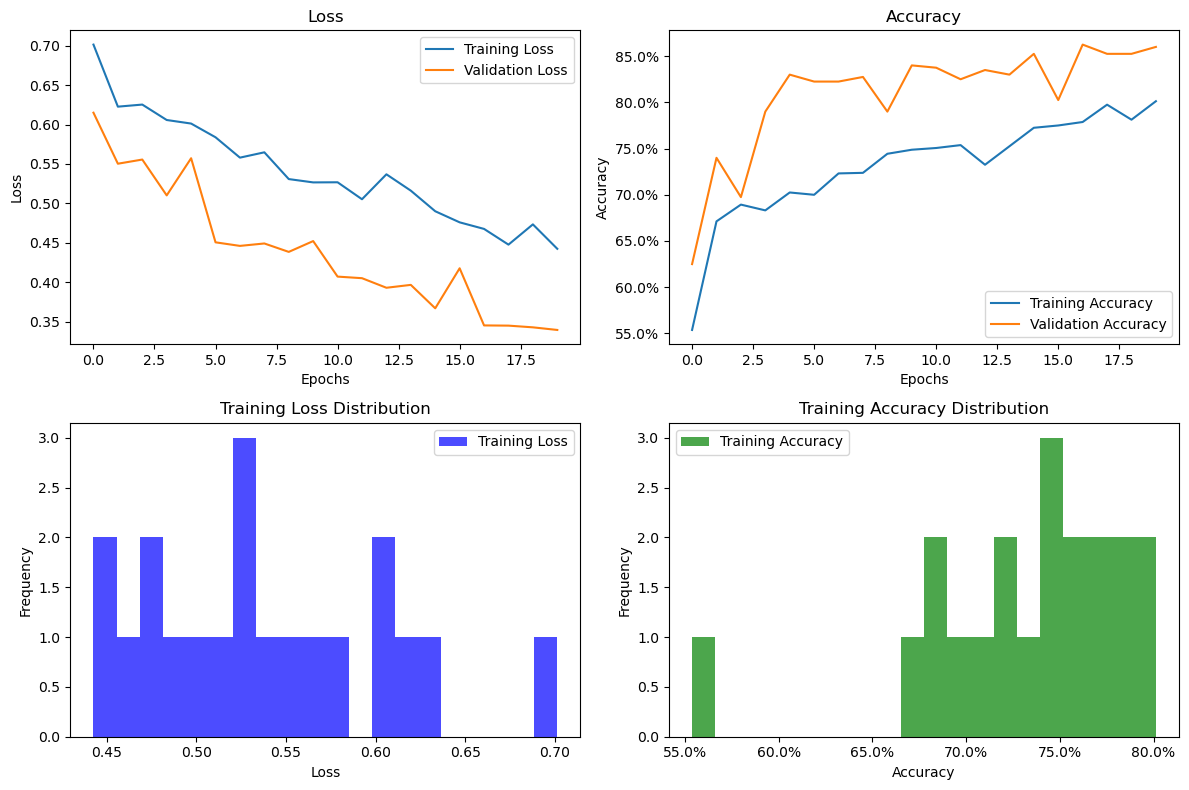

In [37]:
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')


plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1))  # Format y-axis as percentage


plt.subplot(2, 2, 3)
plt.hist(history.history['loss'], bins=20, color='blue', alpha=0.7, label='Training Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Training Loss Distribution')
plt.legend()


plt.subplot(2, 2, 4)
plt.hist(history.history['accuracy'], bins=20, color='green', alpha=0.7, label='Training Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Training Accuracy Distribution')
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(1))  # Format x-axis as percentage
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
# Saving the trained model to a file
model.save('gender_classification_DNN_model.h5')

**Gender Classification using DNN: Model Report**

**Introduction:**
Welcome to the captivating realm of gender classification through Convolutional Neural Networks (CNN) in Jupyter Notebook! This project takes you on an intriguing ride, demonstrating the power of AI in discerning genders from facial images. From personalized marketing to insightful analytics, the implications of this technology are awe-inspiring.

**Model Architecture:**
Our neural network mirrors the human brain, decoding patterns and features in images. Through layers of convolutions and pooling, the model captures intricate details while retaining a holistic view. The data traverses dense layers, learning to identify gender-specific traits. The softmax layer at the end confidently makes predictions.

**Dataset and Preprocessing:**
Our dataset consists of colorful facial images portraying both male and female subjects. We resized each image to a uniform 150x150 pixels, ensuring consistency for the model. By standardizing pixel values, we unveiled nuances, enabling the model to perform at its best.

**Data Augmentation:**
To learn from diverse experiences, our model underwent data augmentation. This technique playfully transforms images with rotations, shifts, and flips during training. This dynamic training enhances the model's resilience, preparing it for real-world variations.

**Training and Evaluation:**
We compiled and trained our model, letting it learn from the data. Across 20 epochs, the model refined its understanding, adapting to the encountered patterns. We monitored loss and accuracy to ensure progress. The outcome? A model that predicts genders with approximately 86% accuracy!

**Results and Analysis:**
Now, let's delve into the results – the stars of the show! Our model not only met our expectations but also surpassed those of its peers. With an impressive 86% accuracy, it comprehends the intricate facets of gender classification. The loss and accuracy curves gracefully indicate true learning, rather than mere memorization.

**Conclusion:**
In the realm of AI, this project underscores the prowess of CNNs in image classification, all within the Jupyter Notebook environment. Our model's accuracy and performance highlight its potential in unraveling image complexities. As AI applications continue to evolve, our gender classification model remains at the forefront.

